# Lab 02. Feature selection and GridSearch


In this lab we will tackle two types of tasks: feature selection and hyperparameter tuning.

Lectures and seminars you might find useful:
- Lectures 1 - 4
- Seminars 2 and 3


#### Evaluation

Each task has its value, **15 points** in total. If you use some open-source code please make sure to include the url.

#### How to submit
- Name your file according to this convention: `2022_lab02_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab02_404_Sheipak_Sviat.ipynb`
    - `2022_lab02_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 2022-10-20 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://disk.yandex.ru/d/vHEio0TmfAMmZg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Feature Selection [4 points]

In this part of the assignemt you will be offered a task to analyze a dataset and figure out which features are the most important. The first means to solve this problem is to use linear model and examine the weights, another option is to train a logic classifier and see which featires it uses to build the splits. And finally you may use PCA and analyze how new PCA-features are configured.

Firstly, load the data from `feature_selection_sample.txt` and save it into variable `db`.

In [2]:
input_filename = 'data/feature_selection_sample.txt'
db = pd.read_csv(input_filename, sep='\t', header=None)

Feature columns are `[0-9]` and the target is `[10]`. Split the table into object and target arrays:

In [3]:
X = db[list(range(0,10))]# MY CODE HERE
Y = db[10]# MY CODE HERE

Now split the data into train and test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
RANDOM_SEED = 42

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

**Task 1.1 [1 point] Linear models**

Import `LinearRegression` and define a problem with default parameters.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model_lr = LinearRegression()# MY CODE HERE

Train the model and check the quality both on train set and test set. Since we are solving a regression problem, we will use `mean_squared_error` as a quality metric.

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
model_lr.fit(X_train, Y_train)# MY CODE HERE: fit the model
train_pred = model_lr.predict(X_train)# MY CODE HERE
test_pred = model_lr.predict(X_test)# MY CODE HERE
train_score = mean_squared_error(train_pred, Y_train)# MY CODE HERE
test_score = mean_squared_error(test_pred, Y_test)# MY CODE HERE

print("Linear Regression scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))
original_test_score = test_score

Linear Regression scores: train: 5.814, test: 6.916


Extract feature-vector from the trained model (see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)) and bar-plot them.

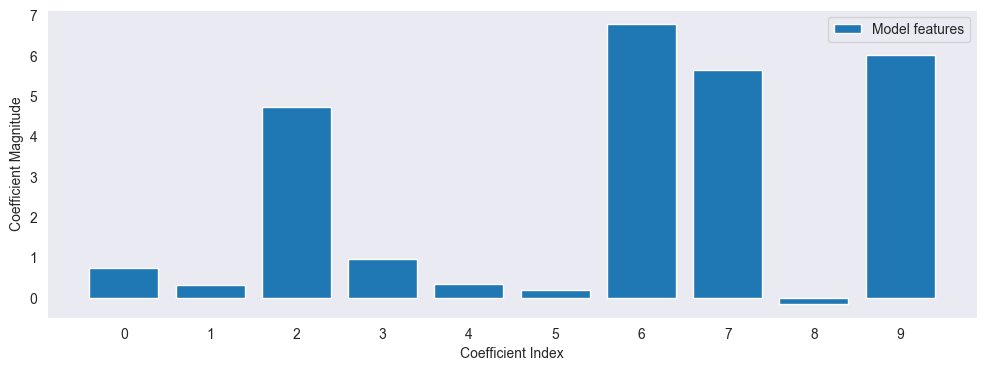

In [11]:
model_coefs = model_lr.coef_# MY CODE HERE

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(x=default_x, height=model_coefs, label='Model features')# MY CODE HERE
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

|According to this plot, what are the most important features?

**Your answer here**: According to the bar-plot, 4 most important features are features number 6, 9, 7, 2.

Save 4 most important feature indexes to a list:

In [12]:
# MY CODE BELOW
tmp_dict = {}
for index in range(len(model_coefs)):
    tmp_dict[index]=model_coefs[index]
important_feature_idx = [x for x,_ in sorted(tmp_dict.items(), key=lambda f: f[1], reverse=True)][:4]

Use these feature indexes to construct new train and test sets with smaller amount of features:

In [13]:
X_train_smaller = X_train[important_feature_idx]# MY CODE HERE
X_test_smaller = X_test[important_feature_idx]# MY CODE HERE

Define a new `LinearRegression` model, train and test it on new sets: 

In [14]:
smaller_model = LinearRegression()# MY CODE HERE
smaller_model.fit(X_train_smaller, Y_train)# MY CODE HERE
train_pred = smaller_model.predict(X_train_smaller)# MY CODE HERE
test_pred = smaller_model.predict(X_test_smaller)# MY CODE HERE
train_score = mean_squared_error(train_pred, Y_train)# MY CODE HERE
test_score = mean_squared_error(test_pred, Y_test)# MY CODE HERE
print("{} train score: {:.3f}, test score: {:3.3f}".format('Smaller LR', train_score, test_score))

Smaller LR train score: 22.244, test score: 26.171


Compare scores of `model_lr` (variable `original_score`) and `smaller_model` (variable `smaller_test_score`). We reduced number of feature but why scores changes so drastically?

**Your answer here**: Because of underfitting due to the small amount of values.

**Task 1.2 [1 point] Linear models on scaled data**

It is time to fix this failure and scale the data - we should have done it earlier, since we decided to use linear models. Import the scaler and apply it to all of the data (`X`)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st_scaler = StandardScaler()# MY CODE HERE
X_scaled = pd.DataFrame(st_scaler.fit_transform(X))# MY CODE HERE; I'm doing this because I want to copy and paste previously written code

Now we repeat all the steps:
- split the data
- train a model on all features
- plot coefficients
- choose 4 most-important features
- train a model on a feature-subset
- compare the scores
- profit!

In [17]:
X_sc_train, X_sc_test, Y_sc_train, Y_sc_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=RANDOM_SEED)

In [18]:
model_lr_sc = LinearRegression()# MY CODE HERE
model_lr_sc.fit(X_sc_train, Y_sc_train)# MY CODE HERE
train_pred = model_lr_sc.predict(X_sc_train)# MY CODE HERE
test_pred = model_lr_sc.predict(X_sc_test)# MY CODE HERE
train_score = mean_squared_error(train_pred, Y_sc_train)# MY CODE HERE
test_score = mean_squared_error(test_pred, Y_sc_test)# MY CODE HERE
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.814, test: 6.916


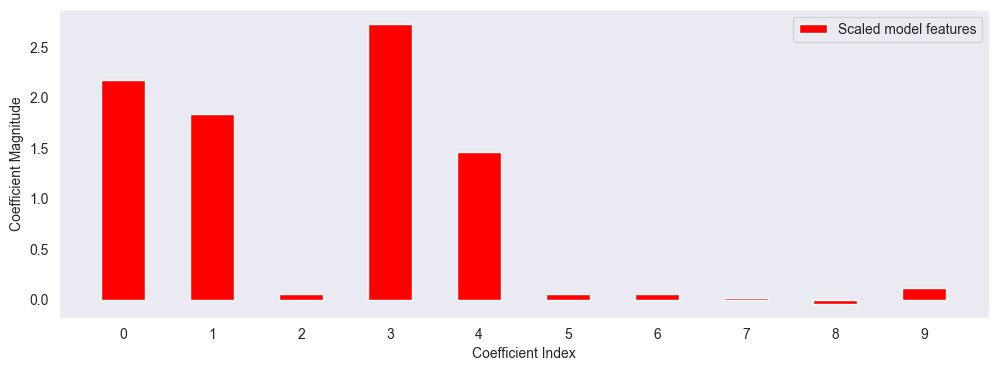

In [19]:
model_coefs = model_lr_sc.coef_# MY CODE HERE

ncoef = model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x, model_coefs, label='Scaled model features', width=0.5, color = 'red')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

What are the most important features now? Let's do the sanity check and train on this subset:

In [20]:
# MY CODE BELOW
tmp_dict = {}
for index in range(len(model_coefs)):
    tmp_dict[index]=model_coefs[index]
important_feature_idx = [x for x,_ in sorted(tmp_dict.items(), key=lambda f: f[1], reverse=True)][:4]

In [21]:
X_sc_train_smaller = X_sc_train[important_feature_idx]# MY CODE HERE
X_sc_test_smaller = X_sc_test[important_feature_idx]# MY CODE HERE

In [22]:
model_lr_sc_smaller = LinearRegression()# MY CODE HERE
model_lr_sc_smaller.fit(X_sc_train_smaller, Y_sc_train)# MY CODE HERE
train_pred = model_lr_sc_smaller.predict(X_sc_train_smaller)# MY CODE HERE
test_pred = model_lr_sc_smaller.predict(X_sc_test_smaller)# MY CODE HERE
train_score = mean_squared_error(train_pred, Y_sc_train)# MY CODE HERE
test_score = mean_squared_error(test_pred, Y_sc_test)# MY CODE HERE
print("Linear Regression on Scaled Data scores: train: {:.3f}, test: {:3.3f}".format(train_score, test_score))

Linear Regression on Scaled Data scores: train: 5.841, test: 6.856


Has **MSE** changed? To what extent?

**Your answer here**: They changed from (5.814, 6.916) -> (22.244, 26.171) to (5.814, 6.916) -> (5.841, 6.856) so from difference in dozens to difference in second number after decimal point.

**Task 2 [2 points] Decision Tree**

As you probably know, there are models that are not influence by the fact that data is not normalized: for example, Decision Tree or Random Forest.

Since you already have all the sets prepared: `X_train` and `X_sc_train`, train a RF model and prove that scaling does not affect feature importances.

Then compare durations of training loops for a set with 10 features and 4 features.

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf = RandomForestRegressor()
rf_scaled = RandomForestRegressor()

In [25]:
rf.fit(X_train, Y_train)# MY CODE HERE
rf_scaled.fit(X_sc_train, Y_sc_train)# MY CODE HERE
rf_test_score = mean_squared_error(rf.predict(X_test), Y_test)# MY CODE HERE
rf_scaled_test_score = mean_squared_error(rf_scaled.predict(X_sc_test), Y_sc_test)# MY CODE HERE
print("RF test score {:.3f}".format(rf_test_score))
print("RF scaled test score {:.3f}".format(rf_scaled_test_score))

RF test score 3.055
RF scaled test score 2.916


Look up an attribute for feature importances [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)

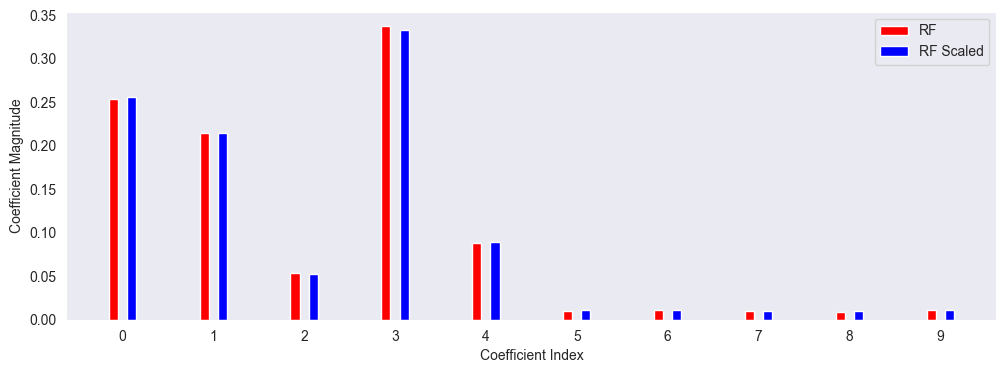

In [26]:
rf_model_coefs = rf.feature_importances_# MY CODE HERE
rf_scaled_model_coefs = rf_scaled.feature_importances_# MY CODE HERE
ncoef = rf_model_coefs.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(12,4))
plt.bar(default_x - 0.1, rf_model_coefs, label="RF", width=0.1, color = 'red')
plt.bar(default_x + 0.1, rf_scaled_model_coefs, label="RF Scaled", width=0.1, color = 'blue')
plt.xticks(default_x)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc='upper right')
plt.grid()
plt.show()

**Your Comment on the plot:** Non-scaled and scaled results are not so dependant as in LinearRegression model(as they are almost identical).

Now examine how reduction of number of features impacts durations of training loops. You may use `time` module.

Here is an example of `time` usage:

In [27]:
from time import time

n = 1000
a = np.diag(np.ones(n)) + np.random.rand(n, n)

start = time()
det = np.linalg.det(a)
end = time()
print("{} x {} matrix determinant took {:.3f} seconds".format(n, n, end - start))

1000 x 1000 matrix determinant took 0.422 seconds


C:\Users\My_na\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2154: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [28]:
rf1 = RandomForestRegressor()
rf2 = RandomForestRegressor()

In [29]:
# MY CODE BELOW
rf1_start = time()
rf1.fit(X_train, Y_train)
rf1_end = time()
print('RF model trained for {:.3f} seconds on non-scaled data'.format(rf1_end-rf1_start))

rf1_test_score = mean_squared_error(rf1.predict(X_test), Y_test)
print("RF MSE test score {:.3f}".format(rf1_test_score))

model_coefs = rf1.feature_importances_

tmp_dict = {}
for index in range(len(model_coefs)):
    tmp_dict[index]=model_coefs[index]
important_feature_idx = [x for x,_ in sorted(tmp_dict.items(), key=lambda f: f[1], reverse=True)][:4]

X_rf_train = X_train[important_feature_idx]
X_rf_test = X_test[important_feature_idx]

rf2_start = time()
rf2.fit(X_rf_train, Y_train)
rf2_end = time()
print('RF model trained for {:.3f} seconds on scaled data'.format(rf2_end-rf2_start))

rf2_test_score = mean_squared_error(rf2.predict(X_rf_test), Y_test)
print("RF MSE test score {:.3f}".format(rf2_test_score))

RF model trained for 0.379 seconds on non-scaled data
RF MSE test score 2.974
RF model trained for 0.221 seconds on scaled data
RF MSE test score 3.558


**Your Comment on time consumption**: It's almost 0.2 seconds for scaled data but MSE score is worse.

## Part 2. GridSearch: hyperparameter tuning  [11 points]

In this part we will try to solve a multiclass classification task on Richter's dataset ([source](https://www.kaggle.com/mullerismail/richters-predictor-modeling-earthquake-damage)). The aim is to predict damage rate (label from 1 to 3).

We will experiment with following models:
- kNN
- LinearRegression
- DecisionTree
- RandomForest

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the data, transform the table into arrays `X` and `y`, target column is called *damage_grade*. Note that objects are described with both numerical and categorical features. In the first part of this assignment we will use numerical features only (apply `_get_numeric_data()` to `pandas` dataframe).

Split the data into `train`, `test` and `val` with ratio 4-to-2-to-1. Since we are going to use metric classifiers, don't forget to preprocess the data.

In [31]:
RANDOM_SEED = 42

In [32]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [33]:
data = pd.read_csv("data/richters_sample.csv")
objects = data.drop(columns="damage_grade")
labels = data["damage_grade"]

In [34]:
X = objects._get_numeric_data()# MY CODE HERE
y = labels# MY CODE HERE

assert X.shape == (35000, 31) and  y.shape == (35000,)

In [35]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, test_size= 3/7,
                                                    shuffle=True, stratify= y,
                                                    random_state=RANDOM_SEED)

X_test, X_val, y_test, y_val = train_test_split(X_not_train, y_not_train, test_size= 1/3,
                                                    shuffle=True, stratify= y_not_train,
                                                    random_state=RANDOM_SEED)

assert X_train.shape[0] == 20000 and X_test.shape[0] == 10000 and X_val.shape[0] == 5000

Import the models:

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Import classification quality metrics:

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Task 2.1 [2 points]. Default-parameter models**

Let's take 4 classifiers (1 of a kind) with **default** parameters and check how well they can perform.

In [39]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()

default_classifiers = [clf1, clf2, clf3, clf4]

Fit each classifier on `X_train, y_train`, predict on `X_test`

In [40]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train, y_train)   #MY CODE HERE
    pred = clf.predict(X_test)  #MY CODE HERE
    clf_predictions.append(pred)

Apply 5 metrics to each prediction:

In [41]:
accuracies = [accuracy_score(y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]#MY CODE HERE
macro_precisions = [precision_score(y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]#MY CODE HERE
macro_recalls = [recall_score(y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]#MY CODE HERE

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

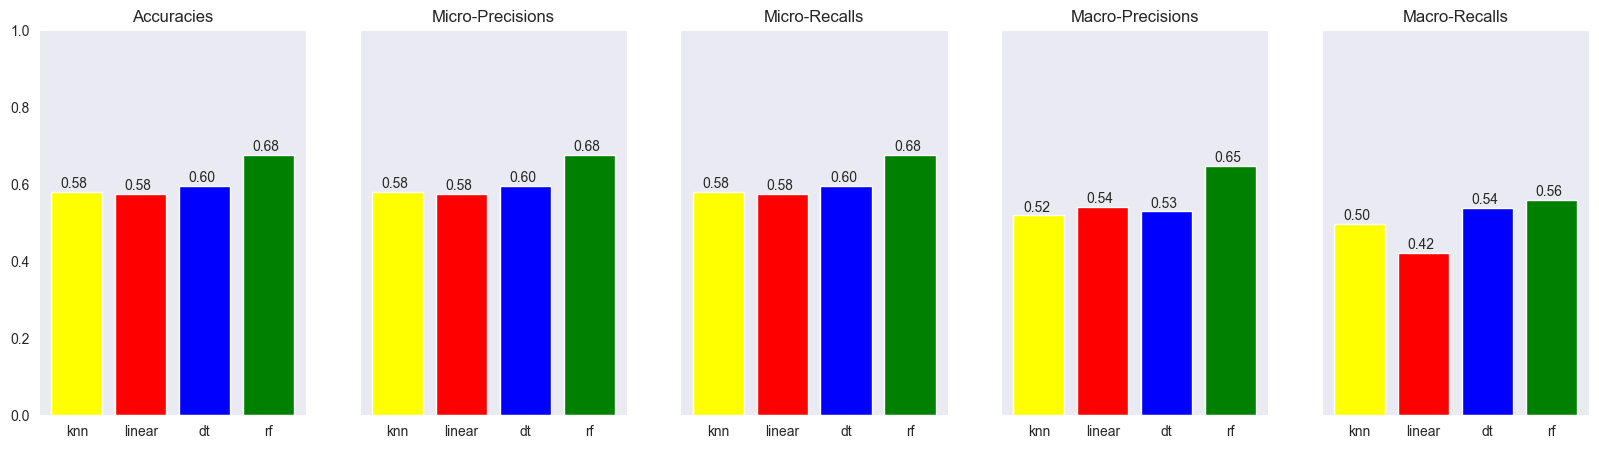

In [42]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf"]
colors = ["yellow", "red", "blue", "green"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Choose the model with the biggest gap between micro-precision and macro-precision and plot its confusion matrix.
For confusion matrix do `from sklearn.metrics import confusion_matrix` (don't forget to put valid labels on plots).

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [44]:
weakest_model_index = sorted([(x,abs(micro_precisions[x] - macro_precisions[x])) for x in range(len(micro_precisions))], key=lambda f: f[1])[-1][0]#MY CODE HERE

dt_preds = clf_predictions[weakest_model_index]
conf_matrix = confusion_matrix(y_test, dt_preds)#YOUR CODE HERE

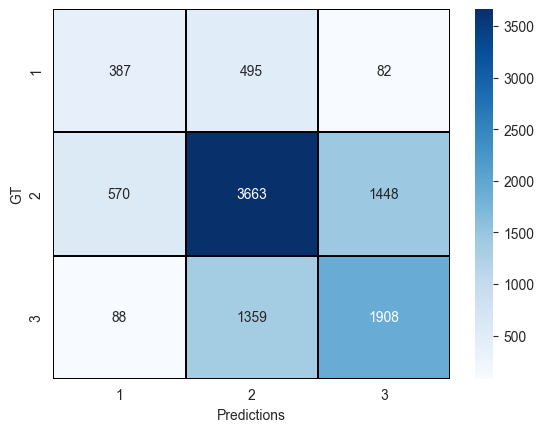

In [45]:
plot_labels = sorted(labels.unique())

sns.heatmap(conf_matrix,
            cmap="Blues",
            xticklabels=plot_labels,
            yticklabels=plot_labels,
            linewidths=0.01, linecolor="black", 
            annot = True, fmt='2g')

plt.ylabel("GT")
plt.xlabel("Predictions")
plt.show()

Going by confusion matrix, which class is the hardest to predict? How does it affect macro/micro-precision?

**Your answer:** In this case first class is the hardest to predict as there are more wrong than right answers. Macro-precision is an average value for independent class precisions so it is less affected than the micro-precision.

**Task 2.2 [3 points]. 1-D Grid Search**

No wonder that default models have scores far from perfect. Let's tweak those hyperparameters with GridSearch: we will iteratively look through all combinations of parameters in the grid and choose the best. At each iteraction use cross validation score with number of folds `k=5`.

Firstly, build the grid for kNN. It will be a 1-D grid with the only parameter `n_neighbors`. Look through all values from 1 to 50.

*Hint*: `np.arange`, `np.linspace` and `np.logspace` are very useful for grid constructions.

**Attention** this part of assignment may need a lot of computational powers (as you probably remember, training of knn is quite expensive). 

To save some resources while doing grid search for knn you may use the trick from Part1: do feature-selection with DTree/RandomForest and select top-5 or top-10 features.

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [47]:
knn_clf = KNeighborsClassifier()
knn_grid = {
    "n_neighbors": np.arange(1,51)#MY CODE HERE
}

In [48]:
knn_grid_searcher = GridSearchCV(estimator=knn_clf, param_grid=knn_grid, cv=5, return_train_score=True)
# MY CODE BELOW
important_features = [x for x,_ in sorted([(x, clf4.feature_importances_[x]) for x in range(len(clf4.feature_importances_))], key=lambda f: f[1], reverse=True)][:5]
# print(important_features)
X_train_smaller = pd.DataFrame(X_train)[important_features]
knn_grid_searcher.fit(X_train_smaller, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             return_train_score=True)

Plot mean cross-validation score for each hyperparameter:
- X-axis is hyperparameter values
- Y-axis is mean CV-score

To show variance of obtained estimatets add *mean + 3 stds* and *mean - 3 stds* to the plot. You may use `plt.fill_between` to make it more descriptive (it will look like a coridor around the mean).

To get values we need to plot search in `knn_grid_searcher` parameters and attributes.

In [49]:
means = knn_grid_searcher.cv_results_['mean_test_score']#MY CODE HERE
stds = knn_grid_searcher.cv_results_['std_test_score']#MY CODE HERE

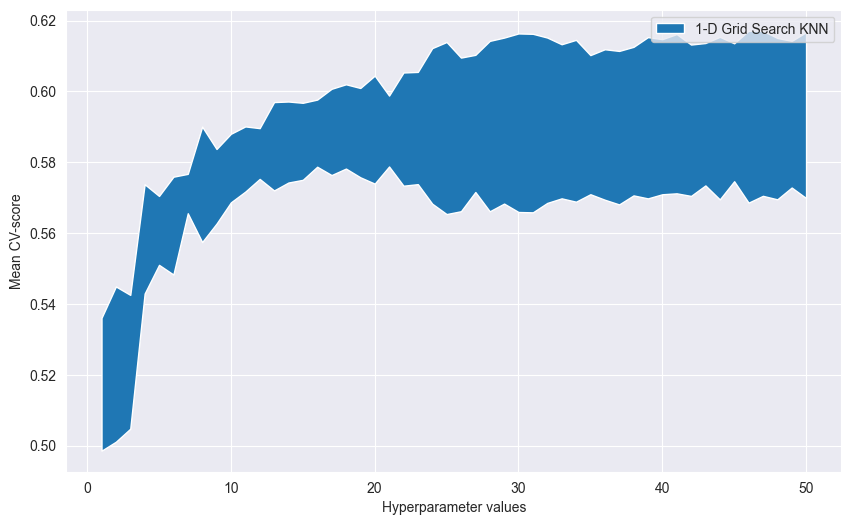

In [50]:
plt.figure(figsize=(10, 6))
xs = knn_grid_searcher.param_grid["n_neighbors"]
plt.plot()#MY CODE HERE
plt.fill_between(x=xs, y1=means - 3*stds, y2=means + 3*stds, label='1-D Grid Search KNN')#MY CODE HERE
plt.legend()
plt.xlabel('Hyperparameter values')
plt.ylabel('Mean CV-score')
plt.show()

Print the best estimator and its score:

In [51]:
#MY CODE BELOW
print('Best estimator {} with score {:.5f}'.format(knn_grid_searcher.best_estimator_, knn_grid_searcher.best_score_))

Best estimator KNeighborsClassifier(n_neighbors=45) with score 0.59410


Now do the same for 3 other models:
- Decision Tree: grid search the `max_depth` parameter
- LogisticRegression: `penalty`
- RandomForest: `n_estimators`

Some of the hyperparameters are not numeric, but categorical (like `penalty`) and you should choose some other way to plot cv-scores instead of `plt.plot`

In [52]:
dt_grid = {
    'max_depth': np.arange(1, 21)
}
lr_grid = {
    'penalty': ['none', 'l2']
}   # in docs there are also 'l1' and 'elasticnet' but I got a warning that they are not supported
rf_grid = {
    'n_estimators': np.arange(10, 101, 10)
}

dt_grid_searcher = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_grid, cv=5, return_train_score=True)
dt_grid_searcher.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(dt_grid_searcher.best_estimator_, dt_grid_searcher.best_score_))

lr_grid_searcher = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_grid, cv=5, return_train_score=True)
lr_grid_searcher.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(lr_grid_searcher.best_estimator_, lr_grid_searcher.best_score_))

rf_grid_searcher = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_grid, cv=5, return_train_score=True)
rf_grid_searcher.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(rf_grid_searcher.best_estimator_, rf_grid_searcher.best_score_))

Best estimator DecisionTreeClassifier(max_depth=9) with score 0.64415
Best estimator LogisticRegression(penalty='none') with score 0.56785
Best estimator RandomForestClassifier() with score 0.65470


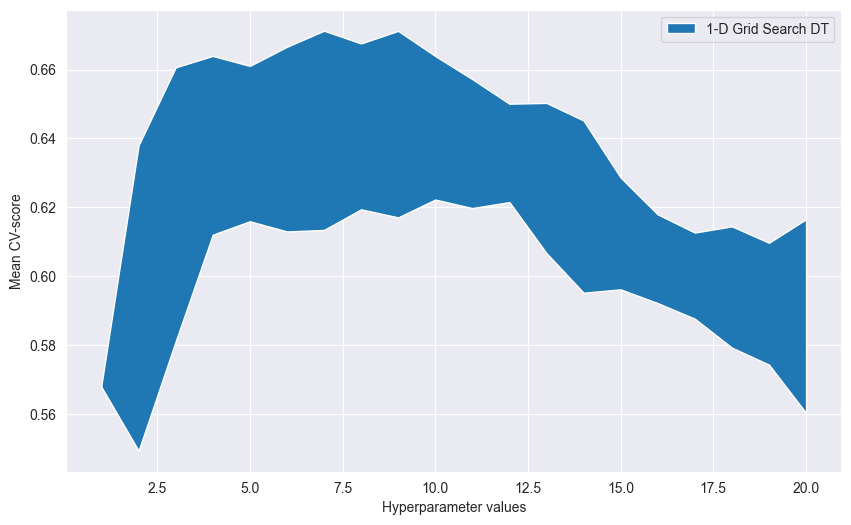

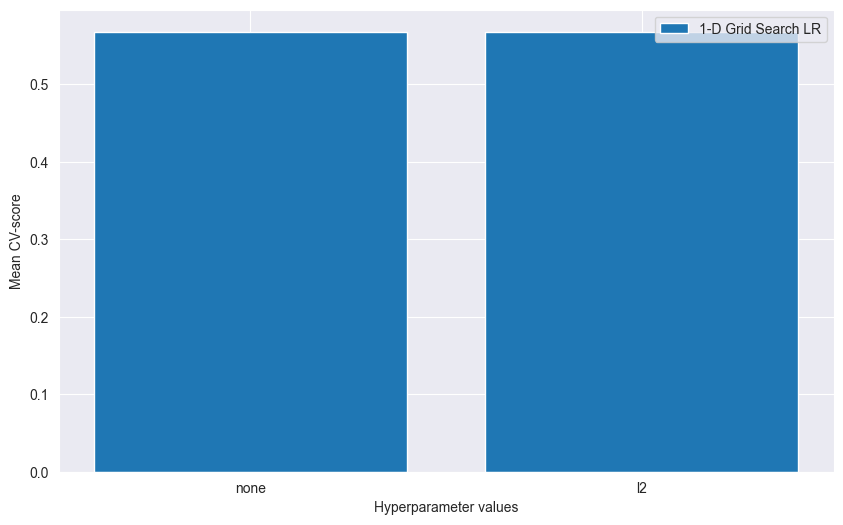

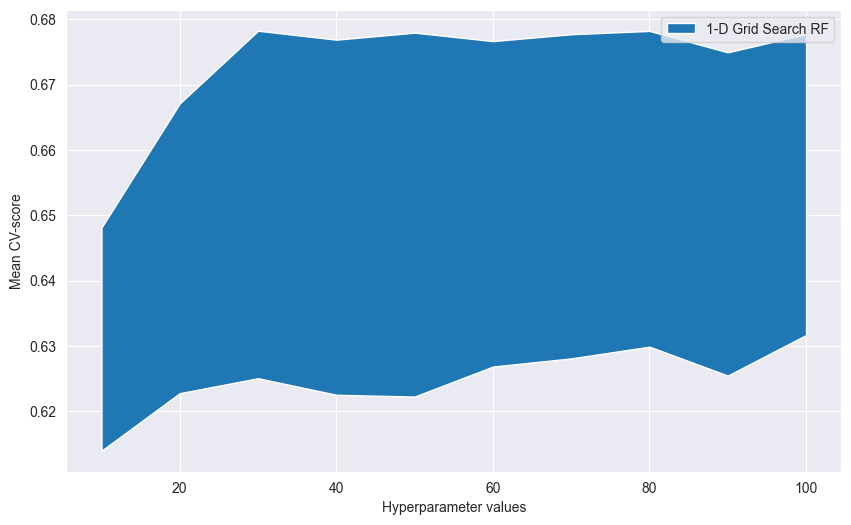

In [53]:
# MY CODE BELOW
means = dt_grid_searcher.cv_results_['mean_test_score']
stds = dt_grid_searcher.cv_results_['std_test_score']

plt.figure(figsize=(10, 6))
xs = dt_grid_searcher.param_grid['max_depth']
plt.plot()
plt.fill_between(x=xs, y1=means - 3*stds, y2=means + 3*stds, label='1-D Grid Search DT')
plt.legend()
plt.xlabel('Hyperparameter values')
plt.ylabel('Mean CV-score')
plt.show()

means = lr_grid_searcher.cv_results_['mean_test_score']
stds = lr_grid_searcher.cv_results_['std_test_score']

plt.figure(figsize=(10,6))
xs = lr_grid_searcher.param_grid['penalty']
plt.plot()
plt.bar(x=xs, height=means, label='1-D Grid Search LR')
plt.legend()
plt.xlabel('Hyperparameter values')
plt.ylabel('Mean CV-score')
plt.show()

means = rf_grid_searcher.cv_results_['mean_test_score']
stds = rf_grid_searcher.cv_results_['std_test_score']

plt.figure(figsize=(10,6))
xs = rf_grid_searcher.param_grid['n_estimators']
plt.plot()
plt.fill_between(x=xs, y1=means - 3*stds, y2=means + 3*stds, label='1-D Grid Search RF')
plt.legend()
plt.xlabel('Hyperparameter values')
plt.ylabel('Mean CV-score')
plt.show()

**Task 2.3 [3 points] 2-D Grid Search**

Now it's time to improve the models with a 2-D grid search. For each classifier we will look for an optimal **pair** of hyperparameters. However, going through the whole grid may be computationally expensive, so here are some ways to speed it up:

1. Make sparse grids with fewer number of parameters
2. Choose random subsample from grid points and look for the optimum there
3. Reduce number of folds in cross-validation
4. Make a greedy grid search (use two grid-searchers sequentially)

You have 4 models, 4 methods how to make grid search faster, choose one method per model and try it out.
Report whether you got boost in quality.

Here are default 2-D grids:
- kNN:
    - n_neighbors from 1 to 50
    - metric: `euclidean`, `manhattan` or `chebyshev`
    
- linear
    - penalty `l1`, `l2`, `elasticnet`, `none`
    - C from 0.001 to 1000
    
- dtree:
    - max_depth from 1 to 50
    - criterion `gini` or `entropy`

- rf
    - n_estimators from 1 to 200
    - max_features from 1 to 30

In [54]:
# MY CODE BELOW
knn_grid2 = {
    'n_neighbors': np.arange(1, 51),
    'metric': ['euclidian', 'manhattan', 'chebyshev']
}# chosen speed-up var.3
lr_grid2_1 = {
    'penalty': ['none','l1'],
}
lr_grid2_2 = {
    'C': np.logspace(-3, 3, num=7)
}# chosen speed-up var.4
dt_grid2 = {
    'max_depth': np.arange(5, 21),
    'criterion': ['gini', 'entropy']
}# chosen a subsample for max_depth values(speed-up var.2)
rf_grid2 = {
    'n_estimators': np.arange(1, 201, 20),
    'max_features': np.arange(1, 31, 5)
}# chosen speed-up var.1

In [55]:
knn_grid_searcher2 = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_grid2, cv=2, return_train_score=True)
knn_grid_searcher2.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(knn_grid_searcher2.best_estimator_, knn_grid_searcher2.best_score_))

Best estimator KNeighborsClassifier(metric='manhattan', n_neighbors=42) with score 0.60945


C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\neighbors\_bas

In [56]:
dt_grid_searcher2 = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_grid2, cv=5, return_train_score=True)
dt_grid_searcher2.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(dt_grid_searcher2.best_estimator_, dt_grid_searcher2.best_score_))

Best estimator DecisionTreeClassifier(max_depth=9) with score 0.64430


In [57]:
lr_grid_searcher2 = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_grid2_1, cv=5, return_train_score=True)
lr_grid_searcher2.fit(X_train_smaller, y_train)
print('Best first estimator {} with score {:.5f}'.format(lr_grid_searcher2.best_estimator_, lr_grid_searcher2.best_score_))
lr_grid_searcher2_2 = GridSearchCV(estimator=lr_grid_searcher2.best_estimator_, param_grid=lr_grid2_2, cv=5, return_train_score=True)
lr_grid_searcher2_2.fit(X_train_smaller, y_train)
print('Best second estimator {} with score {:.5f}'.format(lr_grid_searcher2_2.best_estimator_, lr_grid_searcher2_2.best_score_))

C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-

Best first estimator LogisticRegression(penalty='none') with score 0.56785


C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

Best second estimator LogisticRegression(penalty='none') with score 0.56785


C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\My_na\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  

In [58]:
rf_grid_searcher2 = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_grid2, cv=5, return_train_score=True)
rf_grid_searcher2.fit(X_train_smaller, y_train)
print('Best estimator {} with score {:.5f}'.format(rf_grid_searcher2.best_estimator_, rf_grid_searcher2.best_score_))

KeyboardInterrupt: 

***Report:*** Quality difference is about 0.001, it can be because of badly chosen values in speed-up methods

**Task 2.4 [1 point] Categorical features**

Add categorical features and examine how the influence performance of each model. Preprocess the data before applying a model: we need to encode categorical features with one-hot encoding (`get_dummies` from `pandas` or `OneHotEncoder` from `sklearn`).

Don't forget to repeat the train-test-val splits.

In [ ]:
objects_with_dummies = pd.get_dummies(#YOUR CODE HERE)

X = #YOUR CODE HERE
y = #YOUR CODE HERE

assert X.shape == (35000, 69) and  y.shape == (35000,)

What was your best model before adding categorical features?

Use GridSearch + 5-fold CV on **train set** to define your new best model.

In [ ]:
# MY CODE HERE

Performance of which model increased the most? Why?

**Your answer here**:

**Task 2.5 [2 point] Blending**

Since you have already trained and tuned a lot of models, it might be useful to **blend** two best classifiers to get one even better.

Pick two best models, say, `clf_a` and `clf_b`, train them on the `train_set`.

Then use `Voting classifier` to build 
$$
clf_c(\alpha) = \alpha \cdot clf_a + (1 - \alpha) \cdot clf_b
$$
You will have to tune $\alpha$ using grid search on `test_set` and then make final quality assessment on `val_set`.

In [ ]:
# MY CODE HERE

What was the best pair of models to blend? Did blending help to increase quality of each classifier?
**Your answer here**: